In [3]:
#### Sam Brown
# sam_brown@mines.edu
# 05/28/2025
# Goal: Start Exploring Tide Data.

import sys
sys.path.append("/Users/sambrown04/Documents/SURF/whillans-surf/notebooks/SURF")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import datetime


import my_lib.funcs
from Tides import Tide
import util.coordinate_transforms

# Set path to event files
evts_path = "/Users/sambrown04/Documents/SURF/Events/2014_2014Events2stas"

### USER DEFINED PATH TO TIDE MODEL ###
tide_dir = "/Users/sambrown04/Documents/SURF"
#######################################

tide_mod = "CATS2008-v2023"

In [15]:
events_list = my_lib.funcs.load_evt(evts_path)

In [16]:
events_list[1].head()

,Unnamed: 0,time,la02x,la02y,la02z,la02res,la02res_avg,la04x,la04y,la04z,...,mg06res,mg06res_avg,mg07x,mg07y,mg07z,mg07res,mg07res_avg,sum_res_avg,ressum,event
0,431783,2014-03-16 09:55:00,-276662.204213,-561000.278852,96.3628,0.526657,0.390334,-248818.937617,-577206.014978,71.4185,...,0.006696,0.072702,-185338.836254,-558159.897759,77.5939,0.007189,0.045691,2.959663,3.011666,1.0
1,431784,2014-03-16 09:55:15,-276662.206999,-561000.279839,96.3643,0.526657,0.390334,-248818.937057,-577206.015219,71.4102,...,0.006696,0.072702,-185338.834779,-558159.897930,77.6332,0.007189,0.045691,2.959663,3.011749,1.0
2,431785,2014-03-16 09:55:30,-276662.206040,-561000.277277,96.3606,0.526657,0.390334,-248818.933264,-577206.016196,71.4022,...,0.006696,0.072702,-185338.831691,-558159.897680,77.6005,0.007189,0.045691,2.959663,3.011749,1.0
3,431786,2014-03-16 09:55:45,-276662.202241,-561000.286234,96.3440,0.526657,0.390334,-248818.934665,-577206.019216,71.4152,...,0.006696,0.072702,-185338.836532,-558159.901491,77.6145,0.007189,0.045691,2.959663,3.204086,1.0
4,431787,2014-03-16 09:56:00,-276662.202347,-561000.278086,96.3525,0.526657,0.390334,-248818.933400,-577206.014819,71.4016,...,0.006696,0.072702,-185338.835685,-558159.897310,77.6187,0.007189,0.045691,2.959663,3.204283,1.0


In [17]:
# events_list[20]['gz06x']

In [18]:
# events_list[20]['gz06y']

In [19]:
# la2x = -277520.601623	
# la2y = -560593.378203
# gz6x = -174526.827356
# gz6y = -603574.231262

# lalon, lalat = util.coordinate_transforms.xy2ll(la2x, la2y)


In [20]:
# gzlon,gzlat = util.coordinate_transforms.xy2ll(gz6x, gz6y)
# lalon,lalat

In [21]:
# spacing = 10  # Minutes between model calculations
# days = 30  # Days to run model for

# dates_timeseries = []
# initial_time = datetime.datetime.strptime("2011-06-25", "%Y-%m-%d")
# for i in range(days * HR_PER_DAY * MIN_PER_HR // spacing):  # 30 days * 24 hr/day * 60 min/hr * 1/10 calculations/min
#     dates_timeseries.append(initial_time + datetime.timedelta(minutes=spacing * i))

# tides = Tides.Tide(tide_mod, tide_dir)
# tide_resultsgz = tides.tidal_elevation(
#         [gzlon],
#         [gzlat],
#         dates_timeseries,
#     ).data.T[0]


In [22]:
# fig, ax = plt.subplots(figsize = (10,5))
# ax.plot(dates_timeseries, tide_resultsgz, label = "gz06")
# plt.legend()
# ax.set_xlabel("Date")
# ax.set_ylabel("Tide Height [cm]")
# plt.show()

In [23]:
# function that retrieves tidal data for stations for a period of time
# inputs: events_list, station, days
# outputs, a dataframe of dates and tide height

def get_tide_data(events_list, station, days = 30, spacing = 10, plot = False):

    HR_PER_DAY = 24
    MIN_PER_HR = 60
    
    # Identify station columns names
    x_col = f"{station}x"
    y_col = f"{station}y"
    
    # loop through events to get first instance station is transmitting
    for i, event in enumerate(events_list):
        if not event[x_col].isna().any():# make sure location is transmitting
            # get first instance of coordinates
            x_cor = event.at[0, x_col] 
            y_cor = event.at[0,y_col]
            print(x_cor, y_cor)
            start_time = event.at[0, 'time']
            break

   
    # print(x_cor, y_cor, start_time)
    # now we need to get tidal data
    ### USER DEFINED PATH TO TIDE MODEL ###
    tide_dir = "/Users/sambrown04/Documents/SURF"
    #######################################

    tide_mod = "CATS2008-v2023"
    
    HR_PER_DAY = 24
    MIN_PER_HR = 60

    # create time series data
    dates_timeseries = []
    initial_time = datetime.datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S")
    for i in range(days * HR_PER_DAY * MIN_PER_HR // spacing):  # 30 days * 24 hr/day * 60 min/hr * 1/10 calculations/min
        dates_timeseries.append(initial_time + datetime.timedelta(minutes=spacing * i))

    #convert to lon and lat
    lon, lat = util.coordinate_transforms.xy2ll(x_cor, y_cor)
    print(lon, lat)
    
    tides = Tides.Tide(tide_mod, tide_dir)
    tide_results = tides.tidal_elevation(
        [lon],
        [lat],
        dates_timeseries,
    ).data.T[0]

    if plot:
        fig, ax = plt.subplots(figsize = (10,5))
        ax.plot(dates_timeseries, tide_results, label = f"Station {station}")
        plt.legend()
        ax.set_xlabel("Date")
        ax.set_ylabel("Tide Height [cm]")
        plt.show()

    # print(len(dates_timeseries))
    # print(len(tide_results))
    
    out = pd.DataFrame(columns = ["time", "tide_height"])
    out.loc[:,"time"] = dates_timeseries
    out.loc[:,"tide_height"] = tide_results

    return out
        
    


-178440.6645810543 -555852.7177760643
-162.20225382777775 -84.6307498222222


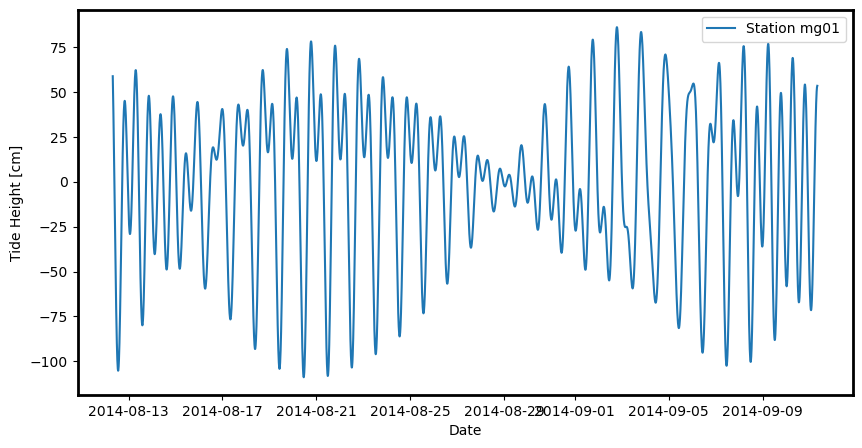

In [24]:
data = get_tide_data(events_list, "mg01", plot = True)

In [25]:
data.head(10)

,time,tide_height
0,2014-08-12 07:54:00,58.702343
1,2014-08-12 08:04:00,54.148842
2,2014-08-12 08:14:00,49.23328
3,2014-08-12 08:24:00,43.979523
4,2014-08-12 08:34:00,38.413833
5,2014-08-12 08:44:00,32.564712
6,2014-08-12 08:54:00,26.462708
7,2014-08-12 09:04:00,20.140224
8,2014-08-12 09:14:00,13.631305
9,2014-08-12 09:24:00,6.971412


In [ ]:
# for a given event, we want to classify whether it is at high tide or low tide.
# indicator for whether tide is positive or negative 
# start by assigning each event with a tide height. at the start of each event get the tide height

In [10]:
refined_df = my_lib.funcs.extract_event_features(events_list)

/Users/sambrown04/Documents/SURF/whillans-surf/notebooks/SURF/my_lib/funcs.py:116: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  event_clean['time_dt'] = pd.to_datetime(event_clean['time'])


In [12]:
refined_df[0].head()

,station,pre-slip_area,slip_severity,peak_time,total_delta
0,la02x,42.762576,5.729466e-07,4320.0,0.282220
1,gz12x,191.702745,5.740474e-07,4275.0,0.319408
2,gz14x,195.277305,3.906819e-07,4260.0,0.328491
3,mg01x,158.976462,3.665595e-07,4305.0,0.254617
4,mg02x,150.360635,4.274066e-07,4260.0,0.257543
